# Logistic Regression Model 

### To predict whether a client will subscribe to a bank term deposit 

### Exploratory Data Analysis

The data is related with direct marketing campaigns of a European banking institution. 
The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, 
in order to access if the product (bank term deposit) 

In [17]:
%matplotlib inline

<IPython.core.display.Javascript object>

In [18]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [19]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import warnings

warnings.filterwarnings("ignore")
sns.set()
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import ClusterCentroids


import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced

<IPython.core.display.Javascript object>

In [20]:
# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# To supress numerical display in scientific notations - only two decimasl for float datatypes
pd.set_option("display.float_format", lambda x: "%.2f" % x)


<IPython.core.display.Javascript object>

#### Create Datasets for analysis

In [21]:
# Dataframe 1: all clients 
df = pd.read_csv('DSA_Data_Set1.csv')

# let's create a copy of the data to avoid any changes to original data
data = df.copy()

# Dataframe #2: clients who actually subscribed
target_yes = data.loc[data['y']=='yes']

# Dataframe #3: clients who did not subscribe
target_no = data.loc[data['y']=='no']


<IPython.core.display.Javascript object>

In [22]:
# see first five rows
data.head(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,ModelPrediction,y
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.10,94.77,-50.80,1.03,4963.60,0.62,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,239,3,999,1,failure,-1.10,94.77,-50.80,1.03,4963.60,0.63,no


<IPython.core.display.Javascript object>

In [24]:
# see last five rows
data.tail(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,ModelPrediction,y
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.10,94.77,-50.80,1.03,4963.60,0.62,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,239,3,999,1,failure,-1.10,94.77,-50.80,1.03,4963.60,0.63,no


<IPython.core.display.Javascript object>

In [25]:
# Dataframe 1: all clients
print("allclients")
data.shape

allclients


(41188, 22)

<IPython.core.display.Javascript object>

In [26]:
# Dataframe 2: clients who actually subscribed
print("subscribed")
target_yes.shape

subscribed


(4640, 22)

<IPython.core.display.Javascript object>

In [27]:
# Dataframe 3: clients who did not subscribe
print("didnotsubscribe")
target_no.shape

didnotsubscribe


(36548, 22)

<IPython.core.display.Javascript object>

#### Explore numerical data - Descriptive Statistics

In [28]:
# Dataframe 1: all the data
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,ModelPrediction
count,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00
mean,40.02,258.29,2.57,962.48,0.17,0.08,93.58,-40.50,3.62,5167.04,0.89
std,10.42,259.28,2.77,186.91,0.49,1.57,0.58,4.63,1.73,72.25,0.13
min,17.00,0.00,1.00,0.00,0.00,-3.40,92.20,-50.80,0.63,4963.60,0.25
25%,32.00,102.00,1.00,999.00,0.00,-1.80,93.08,-42.70,1.34,5099.10,0.86
50%,38.00,180.00,2.00,999.00,0.00,1.10,93.75,-41.80,4.86,5191.00,0.95
75%,47.00,319.00,3.00,999.00,0.00,1.40,93.99,-36.40,4.96,5228.10,0.96
max,98.00,4918.00,56.00,999.00,7.00,1.40,94.77,-26.90,5.04,5228.10,0.99


<IPython.core.display.Javascript object>

In [29]:
# Dataframe 2: clients who subscribed
target_yes.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,ModelPrediction
count,4640.00,4640.00,4640.00,4640.00,4640.00,4640.00,4640.00,4640.00,4640.00,4640.00,4640.00
mean,40.91,553.19,2.05,792.04,0.49,-1.23,93.35,-39.79,2.12,5095.12,0.74
std,13.84,401.17,1.67,403.41,0.86,1.62,0.68,6.14,1.74,87.57,0.20
min,17.00,37.00,1.00,0.00,0.00,-3.40,92.20,-50.80,0.63,4963.60,0.25
25%,31.00,253.00,1.00,999.00,0.00,-1.80,92.89,-46.20,0.85,5017.50,0.58
50%,37.00,449.00,2.00,999.00,0.00,-1.80,93.20,-40.40,1.27,5099.10,0.79
75%,50.00,741.25,2.00,999.00,1.00,-0.10,93.92,-36.10,4.41,5191.00,0.94
max,98.00,4199.00,23.00,999.00,6.00,1.40,94.77,-26.90,5.04,5228.10,0.98


<IPython.core.display.Javascript object>

In [30]:
# Dataframe 3: clients who did not subscribe
target_no.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,ModelPrediction
count,36548.00,36548.00,36548.00,36548.00,36548.00,36548.00,36548.00,36548.00,36548.00,36548.00,36548.00
mean,39.91,220.84,2.63,984.11,0.13,0.25,93.60,-40.59,3.81,5176.17,0.91
std,9.90,207.10,2.87,120.66,0.41,1.48,0.56,4.39,1.64,64.57,0.10
min,17.00,0.00,1.00,0.00,0.00,-3.40,92.20,-50.80,0.63,4963.60,0.27
25%,32.00,95.00,1.00,999.00,0.00,-1.80,93.08,-42.70,1.41,5099.10,0.88
50%,38.00,163.50,2.00,999.00,0.00,1.10,93.92,-41.80,4.86,5195.80,0.95
75%,47.00,279.00,3.00,999.00,0.00,1.40,93.99,-36.40,4.96,5228.10,0.96
max,95.00,4918.00,56.00,999.00,7.00,1.40,94.77,-26.90,5.04,5228.10,0.99


<IPython.core.display.Javascript object>

In [31]:
# checking the names of the columns in the data
print(data.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'ModelPrediction', 'y'],
      dtype='object')


<IPython.core.display.Javascript object>

In [32]:
# checking column datatypes and number of non-null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              41188 non-null  int64  
 1   job              41188 non-null  object 
 2   marital          41188 non-null  object 
 3   education        41188 non-null  object 
 4   default          41188 non-null  object 
 5   housing          41188 non-null  object 
 6   loan             41188 non-null  object 
 7   contact          41188 non-null  object 
 8   month            41188 non-null  object 
 9   day_of_week      41188 non-null  object 
 10  duration         41188 non-null  int64  
 11  campaign         41188 non-null  int64  
 12  pdays            41188 non-null  int64  
 13  previous         41188 non-null  int64  
 14  poutcome         41188 non-null  object 
 15  emp.var.rate     41188 non-null  float64
 16  cons.price.idx   41188 non-null  float64
 17  cons.conf.id

<IPython.core.display.Javascript object>

### Fixing the data types

* The columns that are *object* type we can change them to categories.

* *Coverting objects to category reduces the data space required to store the dataframe*

In [33]:
data["job"] = data["job"].astype("category")
data["marital"] = data["marital"].astype("category")
data["education"] = data["education"].astype("category")
data["default"] = data["default"].astype("category")
data["housing"] = data["housing"].astype("category")
data["loan"] = data["loan"].astype("category")
data["contact"] = data["contact"].astype("category")
data["month"] = data["month"].astype("category")
data["day_of_week"] = data["day_of_week"].astype("category")

<IPython.core.display.Javascript object>

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   age              41188 non-null  int64   
 1   job              41188 non-null  category
 2   marital          41188 non-null  category
 3   education        41188 non-null  category
 4   default          41188 non-null  category
 5   housing          41188 non-null  category
 6   loan             41188 non-null  category
 7   contact          41188 non-null  category
 8   month            41188 non-null  category
 9   day_of_week      41188 non-null  category
 10  duration         41188 non-null  int64   
 11  campaign         41188 non-null  int64   
 12  pdays            41188 non-null  int64   
 13  previous         41188 non-null  int64   
 14  poutcome         41188 non-null  object  
 15  emp.var.rate     41188 non-null  float64 
 16  cons.price.idx   41188 non-null  float64

<IPython.core.display.Javascript object>

* We can see that the memory usage has decreased

In [39]:
# checking for duplicate values in the data
data.duplicated().sum()

12

<IPython.core.display.Javascript object>

- There are 12 duplicate values in the data.

### Checking for missing values in the data

In [40]:
data.isnull().sum()

age                0
job                0
marital            0
education          0
default            0
housing            0
loan               0
contact            0
month              0
day_of_week        0
duration           0
campaign           0
pdays              0
previous           0
poutcome           0
emp.var.rate       0
cons.price.idx     0
cons.conf.idx      0
euribor3m          0
nr.employed        0
ModelPrediction    0
y                  0
dtype: int64

<IPython.core.display.Javascript object>

* There are no missing values in the dataset

### Visualize numerical columns

In [42]:
# filtering non-numeric columns
num_columns = data.select_dtypes(include=np.number).columns
num_columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'ModelPrediction'],
      dtype='object')

<IPython.core.display.Javascript object>

In [46]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(10, 5), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

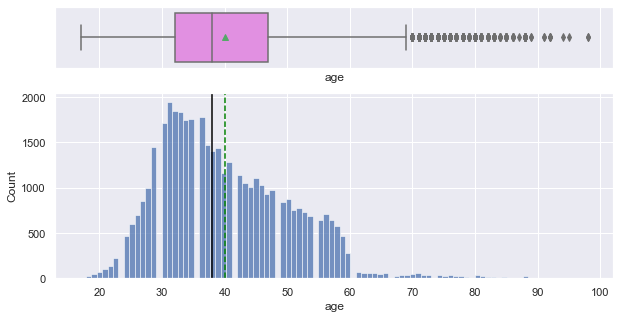

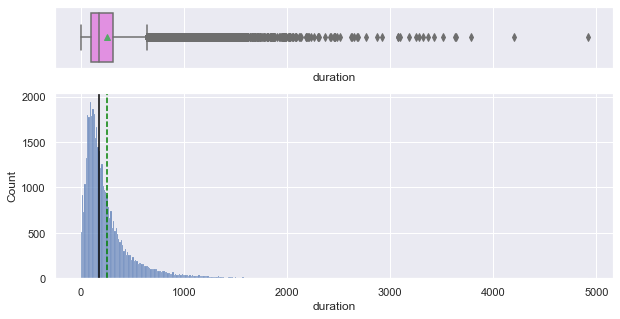

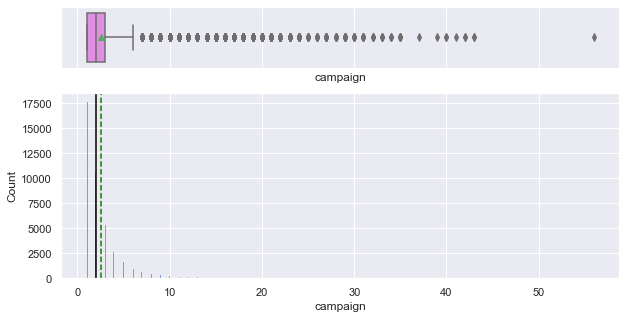

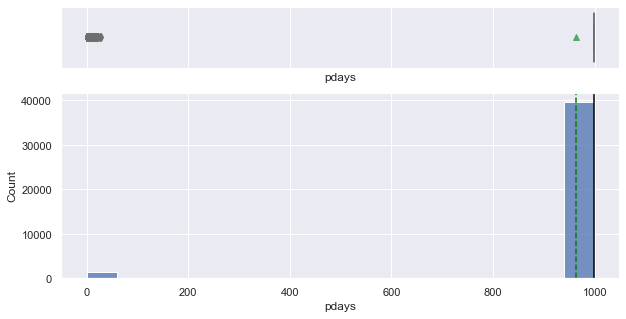

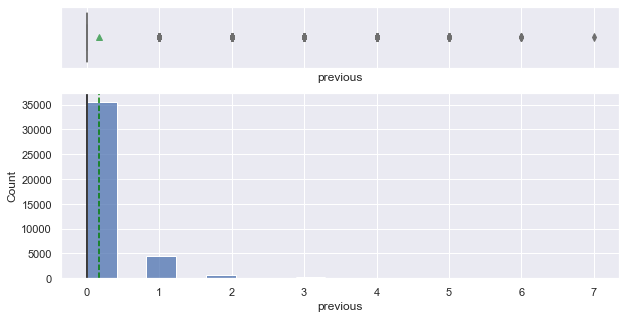

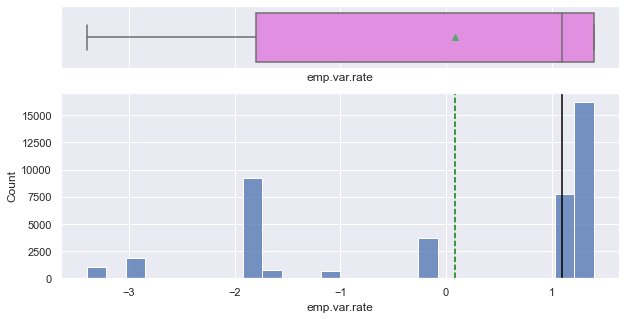

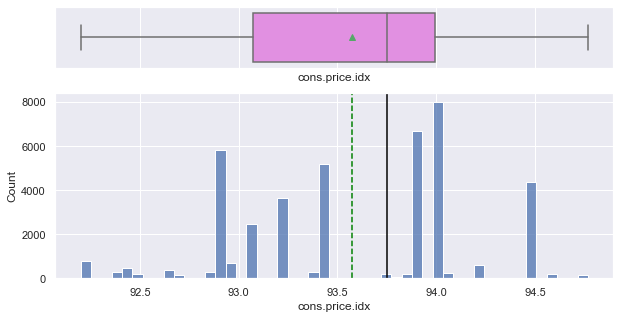

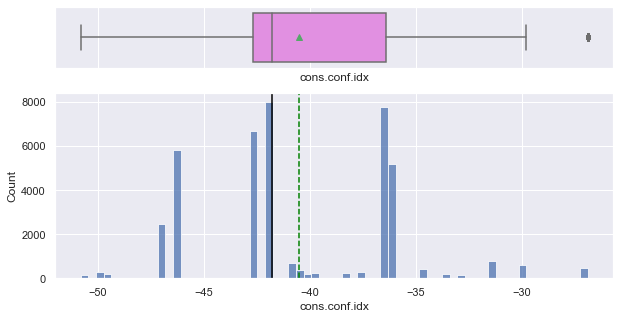

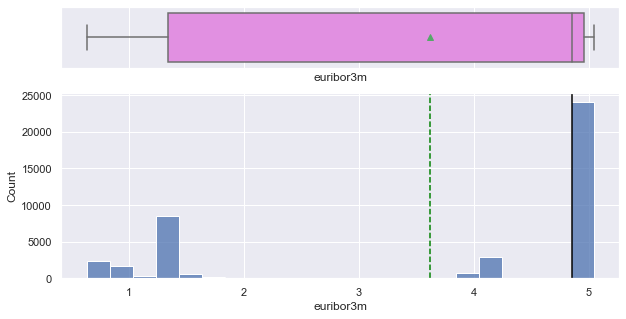

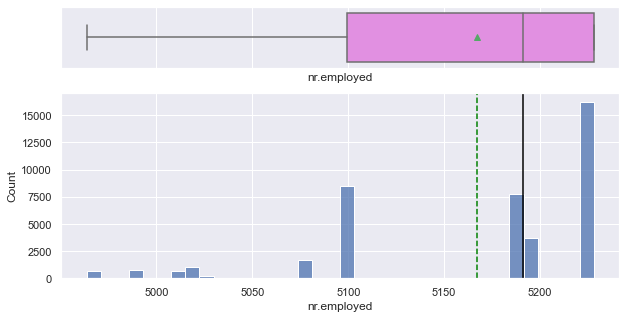

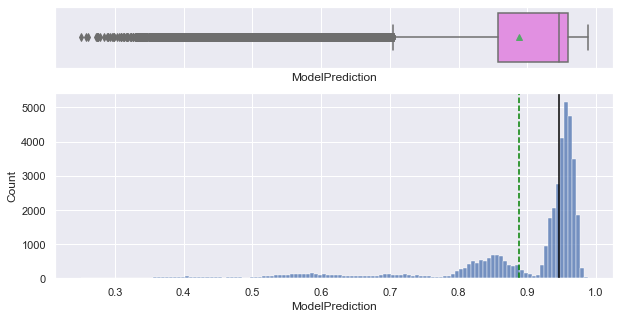

<IPython.core.display.Javascript object>

In [47]:
######## To activate the function massively
# Loop
for col in num_columns:
    histogram_boxplot(data, col)

In [45]:
# filtering numeric columns
cat_columns = data.select_dtypes(exclude=np.number).columns
cat_columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

<IPython.core.display.Javascript object>